<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/01-Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction {#introduction}


In [ ]:
# Install time series packages step by step
required_packages <- c(
  "tidyverse",
  "xts",
  "quantmod",
  "lubridate",
  "eurostat",
  "forecast"
)

for (pkg in required_packages) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg)
  }
}

library(xts)
library(quantmod)
library(lubridate)
library(eurostat)
library(forecast)


Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




## Time Series Definition

A *time series* is a sequence of values ordered by time. This course will focus on series that take values in $\mathbb{R}$. Let
$x_1, x_2, \ldots, x_T$ be a sequence of values ordered by a time index
$t = 1,\ldots,T$. The value of the series is determined by:

$$
\begin{align}
x_t & = (1 + 0.02)x_{t - 1},\quad x_0 = 10 \implies \\
x_t & = 10 \times(1 + 0.02)^{t} \\
\end{align}
$$ {#eq-geom-series}

Lets compute and plot the values of this sequence for $t = 1,\ldots,20$.

:::{.callout-note}
## Regular and Irregular Time Series

In this course we will deal with observations
recorded at fixed time intervals (e.g. hourly, daily, weekly, monthly, annually, etc.).
For example, _every day_ you measure your morning travel duration from home to the university.

Consider your daily step count. Let's say you copy
the number of steps at the end of the day from your
health app into a spreadsheet. Sometimes do it on Monday
evening, sometime on a Wednesday, sometimes you might miss a
couple of weeks and record it again. This would be
an example of an _irregular_ time series (of your daily step counts).

:::

## A Deterministic Time Series


Let's start with a very simple *deterministic* series giving the amount of money in a bank account that earns 2\% interest per time period (e.g. month or year) with an initial amount ($x_0$) of 10 USD at the start ($t=0$).

$$
\begin{align}
x_t & = (1 + 0.02)x_{t - 1},\quad x_0 = 10
\end{align}
$$

$$
\begin{align}
x_t & = (1 + 0.02)^{t} x_{0}, \quad x_0 = 10
\end{align}
$$

$$
\begin{align}
x_{0} & = 10 \\
x_{7} & = 1.02^{7}\times 10 \approx 11.487
\end{align}
$$

In [ ]:
# Example: Creating a geometric series as mentioned in the notebook
# x_t = 10 * (1 + 0.02)^t

# Create time series data

dt_geom <- tibble(
  t = 1:100,
  x_t = 10 * (1 + 0.02)^t
)

# Display the first few values
head(geom_dt)


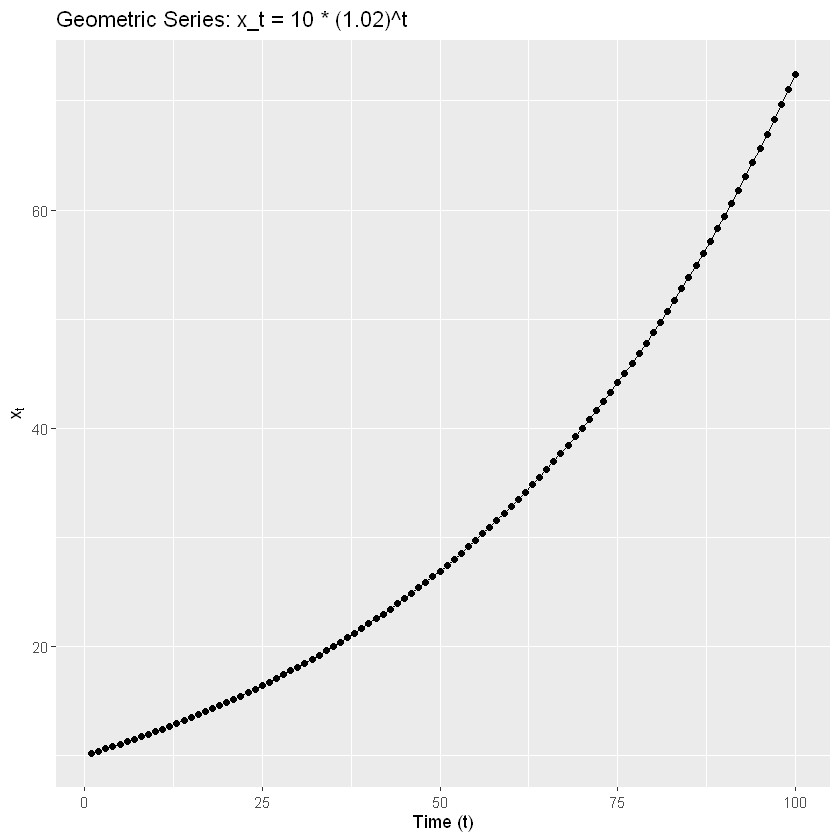

In [ ]:
dt_geom %>%
    ggplot(aes(x = t, y = x_t)) +
    geom_point() +
    geom_line() +
    labs(
      title = "Geometric Series: x_t = 10 * (1.02)^t",
      x = "Time (t)",
      y = expression(x[t])
    )

## Date and Time objects in R

Internally, dates are stored as the number of days since a (arbitrary) reference (origin). The default origin in R is the first of January 1970.


:::{.callout-important }
## Default Date Format

When using string literals to create date objects, R expects the format "YYYY-MM-DD" (i.e. four digits for the year, two digits for the month and two digits for the day).
It is easiest to remember this format and use it consistently. If you supply a different format, you will need to specify it explicitly using the `format` argument of the `as.Date` function.

:::

In [ ]:
# Working with Date objects
origin <- as.Date("1970-01-01")
jan02.1970 <- as.Date("1970-01-02")

origin
jan02.1970

as.numeric(origin)
as.numeric(jan02.1970)

origin + 5
origin + 5:10

[1] "1970-01-01"

[1] "1970-01-02"

[1] 0

[1] 1

[1] "1970-01-06"

[1] "1970-01-06" "1970-01-07" "1970-01-08" "1970-01-09" "1970-01-10"
[6] "1970-01-11"

Time is stored as the number of seconds (and fractions of a second)
since the origin: 1970-01-01 00:00:00
[UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time). POSIX
stands for [Portable Operating System
Interface](https://en.wikipedia.org/wiki/POSIX).

The package `lubridate` provides utility functions for working with date
and time objects. You can look at this online guide
[here](https://lubridate.tidyverse.org/).

In [ ]:
origin1 <- as.Date("01-01-1970", format = "%d-%m-%Y")
as.numeric(origin1)

[1] 0

In [ ]:
# Working with lubridate
# Sys.time returns the current date
today <- Sys.Date()

# The year
print("The year is:")
year(today)

# Print the value of today
print("Today is:")
today

# Day of the month
print("The day of the month is:")
day(today)

# Day of the week (depends on the start of week assumption and is locale dependent!)
print("The day of the week (number) is:")

wday(today)

print("The day of the week (number, week starts on Monday) is:")

wday(today, week_start = 1)

# Day of the week as string (also locale dependent)
print("The day of the week (factor) is:")
wday(today, label = TRUE)

# Day of the year
print("The day of the year is:")
yday(today)

# Week of the year
print("The week of the year is:")
week(today)

# Month of the year
print("The month (number) is:")
month(today)

print("The month (factor) is:")
# Quarter of the year
quarter(today)

[1] "The year is:"


[1] 2025

[1] "Today is:"


[1] "2025-09-28"

[1] "The day of the month is:"


[1] 28

[1] "The day of the week (number) is:"


[1] 1

[1] "The day of the week (number, week starts on Monday) is:"


[1] 7

[1] "The day of the week (factor) is:"


[1] Sun
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

[1] "The day of the year is:"


[1] 271

[1] "The week of the year is:"


[1] 39

[1] "The month (number) is:"


[1] 9

[1] "The month (factor) is:"


[1] 3

### Exercise: Date Objects in R

1. What day of the week was the 10-th of June 2019?
2. Create a sequence of 34 consecutive dates starting on the 2-nd of January 2017. What was the year quarter of the last date of this sequence?

In [ ]:
# Exercise solution space
# Type your code here


## Time Series Classes

There is nothing intrinsically special about time series data. They are just data that are indexed by time. However, there are several classes in R that
can make your life a lot easier when working with time series data by providing specialized functionality.

There are several classes that are used for storing time series in
R. We will mainly focus on `tsibble`, but some functions we will encounter later in the course return or require `ts` or `xts` objects.

- `ts`
- `xts` (see the [xts vignette](https://cran.r-project.org/web/packages/xts/vignettes/xts.pdf))
- `tsibble` (see the [introduction to tsibble](https://cran.rstudio.com/web/packages/tsibble/vignettes/intro-tsibble.html))

### The `ts` class

The `ts` class is part of base R and is the oldest time series class in R. Many functions in R expect or return `ts` objects.
To create a `ts` object, you can use the `ts()` function which expects a numeric vector (numbers) and some additional arguments.

- `start` - the time of the first observation. This can be a single number or a vector of two numbers (e.g. for monthly data you can specify the year and the month of the first observation).
- `end` - the time of the last observation.
- `frequency` - the number of observations per unit of time. For example, for monthly data this would be 12, for quarterly data 4, for annual data 1, etc.

You can find more information about the `ts` class in the [R documentation](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ts.html) or by calling `?ts` in R.


In [ ]:
year(today)

[1] 2025

In [ ]:
# Exercise: extract the amount from the dt_geom tibble and create a ts object
# With a start time of today and assume that the data is monthly
# Use the `today` variable that we created earlier

ts_geom <- ts(dt_geom$x_t, start = c(year(today), month(today)), frequency = 12)
ts_geom

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2025,,,,,,,,,10.20000,10.40400,10.61208,10.82432
2026,11.04081,11.26162,11.48686,11.71659,11.95093,12.18994,12.43374,12.68242,12.93607,13.19479,13.45868,13.72786
2027,14.00241,14.28246,14.56811,14.85947,15.15666,15.45980,15.76899,16.08437,16.40606,16.73418,17.06886,17.41024
2028,17.75845,18.11362,18.47589,18.84541,19.22231,19.60676,19.99890,20.39887,20.80685,21.22299,21.64745,22.08040
2029,22.52200,22.97244,23.43189,23.90053,24.37854,24.86611,25.36344,25.87070,26.38812,26.91588,27.45420,28.00328
2030,28.56335,29.13461,29.71731,30.31165,30.91789,31.53624,32.16697,32.81031,33.46651,34.13584,34.81856,35.51493
2031,36.22523,36.94974,37.68873,38.44251,39.21136,39.99558,40.79549,41.61140,42.44363,43.29250,44.15835,45.04152
2032,45.94235,46.86120,47.79842,48.75439,49.72948,50.72407,51.73855,52.77332,53.82879,54.90536,56.00347,57.12354
2033,58.26601,59.43133,60.61996,61.83236,63.06900,64.33038,65.61699,66.92933,68.26792,69.63328,71.02594,72.44646


In [ ]:
# Exercise: create a ts object but set the start to today's date. What happens?


[1] "2025-09-28"

### The `xts` class

The `xts` class provides a more flexible way to work with time series data, for example by providing
an easy interface for subsetting time series data by date ranges, rolling window calculations, etc.

Detailed information about the `xts` class can be found in the [xts vignette](https://cran.r-project.org/web/packages/xts/vignettes/xts.pdf).

Different from `ts` objects, `xts` objects can have arbitrary time indices (e.g. daily data, hourly data, etc.) and do not require a fixed frequency.
However, you need to provide a proper time index when creating an `xts` object (e.g. using `as.Date()`).
Another difference is that `xts` objects can have multiple columns (e.g. for multivariate time series).


In [ ]:
# Exercise: create an xts object for the geometric series data
# You will need to create a vector of dates for the order.by argument
# Take the `today` variable that we created earlier and create a sequence of dates
# that is monthly and has the same length as the number of rows in dt_geom

xts_geom <- xts(dt_geom$x_t, order.by = seq(from = today, by = "month", length.out = nrow(dt_geom)))
xts_geom %>% head()

               [,1]
2025-09-28 10.20000
2025-10-28 10.40400
2025-11-28 10.61208
2025-12-28 10.82432
2026-01-28 11.04081
2026-02-28 11.26162

In [ ]:
# Now you can use the xts_geom object with all xts functions.
# For example, we can plot it using the plot.xts function


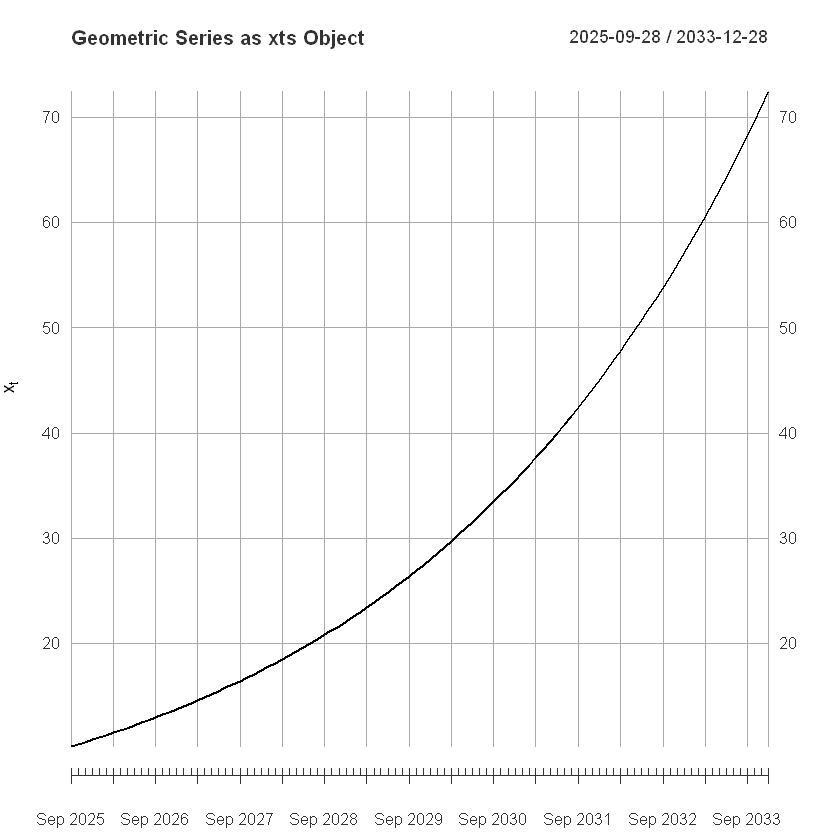

In [ ]:
plot(x = xts_geom, main = "Geometric Series as xts Object", ylab = expression(x[t]), xlab = "Date")

You can select subsets from `xts` objects using date ranges. For example, to select all observations from January 2020, you can use the following code:

```r
xts_geom["2025-01"]
```

To select all observations from 2025-10-15 to 2025-12-31, you can use:

```r
xts_geom["2025-10-15/2025-12"]
```


In [ ]:
# Extract the values after 2025-11-20


In [ ]:
# Extract the values before 2027-09

In [ ]:
head(xts_geom)

               [,1]
2025-09-28 10.20000
2025-10-28 10.40400
2025-11-28 10.61208
2025-12-28 10.82432
2026-01-28 11.04081
2026-02-28 11.26162

In [ ]:
# Calculate the quarterly average using apply.quarterly

apply.quarterly(xts_geom, mean)

NOTE: `apply.quarterly(..., FUN = mean)` operates by column, unlike other math
  functions (e.g. median, sum, var, sd). Please use `FUN = colMeans` instead,
  and use `FUN = function(x) mean(x)` to take the mean of all columns. Set
  `options(xts.message.period.apply.mean = FALSE)` to suppress this message.



               [,1]
2025-09-28 10.20000
2025-12-28 10.61347
2026-03-28 11.26310
2026-06-28 11.95249
2026-09-28 12.68408
2026-12-28 13.46044
2027-03-28 14.28433
2027-06-28 15.15864
2027-09-28 16.08648
2027-12-28 17.07110
2028-03-28 18.11598
2028-06-28 19.22483
2028-09-28 20.40154
2028-12-28 21.65028
2029-03-28 22.97545
2029-06-28 24.38173
2029-09-28 25.87409
2029-12-28 27.45779
2030-03-28 29.13842
2030-06-28 30.92193
2030-09-28 32.81460
2030-12-28 34.82311
2031-03-28 36.95457
2031-06-28 39.21648
2031-09-28 41.61684
2031-12-28 44.16413
2032-03-28 46.86732
2032-06-28 49.73598
2032-09-28 52.78022
2032-12-28 56.01079
2033-03-28 59.43910
2033-06-28 63.07725
2033-09-28 66.93808
2033-12-28 71.03523

In [ ]:
# Calculate the average using a sliding window of 12 months

rollapply(xts_geom, width = 12, FUN = mean, by = 1, align = "right", fill = NA)

               [,1]
2025-09-28       NA
2025-10-28       NA
2025-11-28       NA
2025-12-28       NA
2026-01-28       NA
2026-02-28       NA
2026-03-28       NA
2026-04-28       NA
2026-05-28       NA
2026-06-28       NA
2026-07-28       NA
2026-08-28 11.40028
2026-09-28 11.62828
2026-10-28 11.86085
2026-11-28 12.09806
2026-12-28 12.34003
2027-01-28 12.58683
2027-02-28 12.83856
2027-03-28 13.09533
2027-04-28 13.35724
2027-05-28 13.62439
2027-06-28 13.89687
2027-07-28 14.17481
2027-08-28 14.45831
2027-09-28 14.74747
2027-10-28 15.04242
2027-11-28 15.34327
2027-12-28 15.65014
2028-01-28 15.96314
2028-02-28 16.28240
2028-03-28 16.60805
2028-04-28 16.94021
2028-05-28 17.27902
2028-06-28 17.62460
2028-07-28 17.97709
2028-08-28 18.33663
2028-09-28 18.70336
2028-10-28 19.07743
2028-11-28 19.45898
2028-12-28 19.84816
2029-01-28 20.24512
2029-02-28 20.65002
2029-03-28 21.06302
2029-04-28 21.48428
2029-05-28 21.91397
2029-06-28 22.35225
2029-07-28 22.79929
2029-08-28 23.25528
2029-09-28 23.72038


## Rate of Change

A central theme in this course will be the study of _change_ in time series. We will work with mainly three measures of change:

1. The absolute change $x_t - x_{t-1}$ (if we think about $x_t$ as the value today, then $x_{t-1}$ is the value yesterday (or the previous month in this particular case)).
   because we will refer often to this measure, we will use a special shorthand notation for it:

    $$
    \Delta x_t = x_t - x_{t-1}
    $$

    and we will call it the *first difference* of the series $x_t$.

2. The relative change
    $$
    r_t = \frac{x_t - x_{t-1}}{x_{t-1}}
    $$
    
    which is the absolute change relative to the previous value. This measure is often expressed in percentage points (i.e. multiplied by 100).
    This measure is often called the *rate of change* or the *growth rate* of the series $x_t$.
    In financial applications this measure is often called the return of the series $x_t$.

3. The logarithmic difference
    $$
    \log(x_t) - \log(x_{t-1}) \approx r_t
    $$
    
    which is the difference of the logarithms of the two values. This measure is often called the *log return* or the *continuously compounded return* of an asset if $x_t$ is the asset's value. Note that
    this generally makes sense only for positive values of $x_t$ as the logarithm is not defined for non-positive values (including zero).


In [ ]:
# Exercise: calculate the returns and the log-returns of the geometric series
# Use the diff, log and lag functions


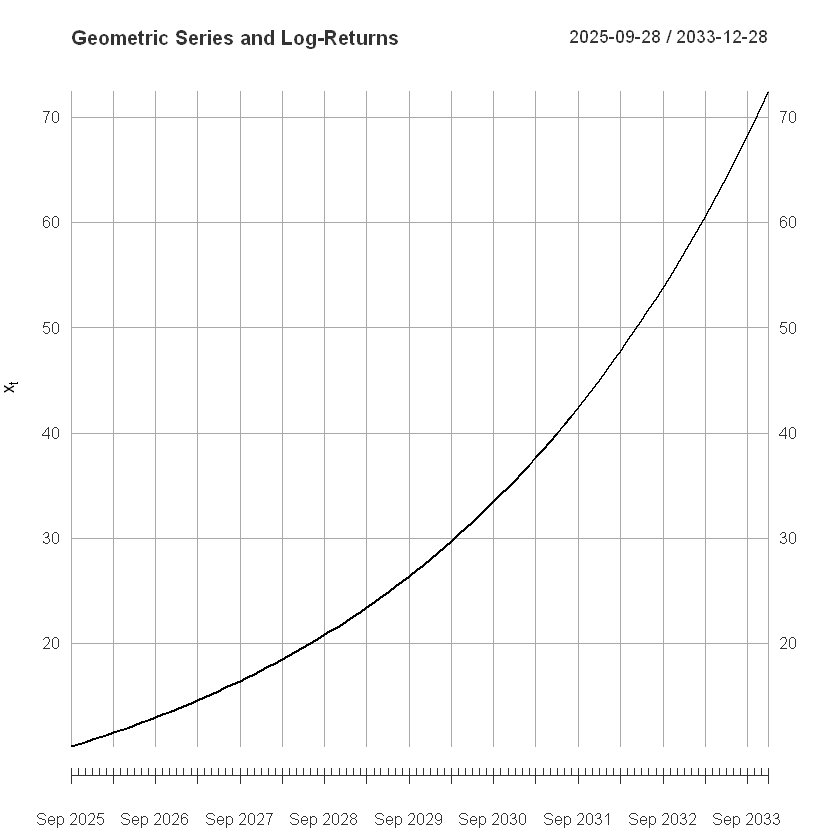

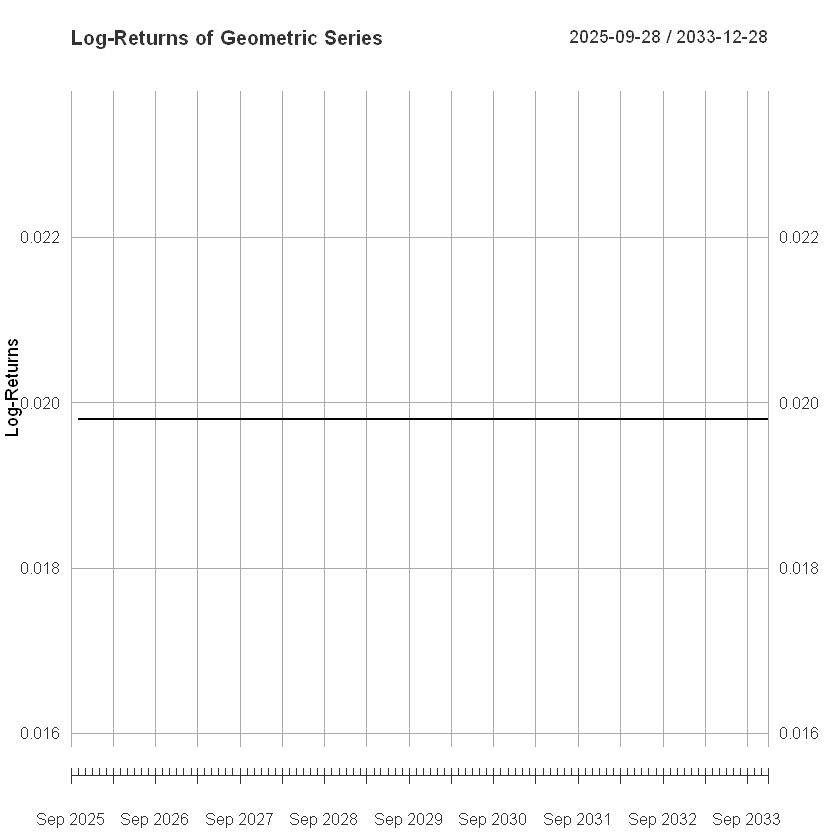

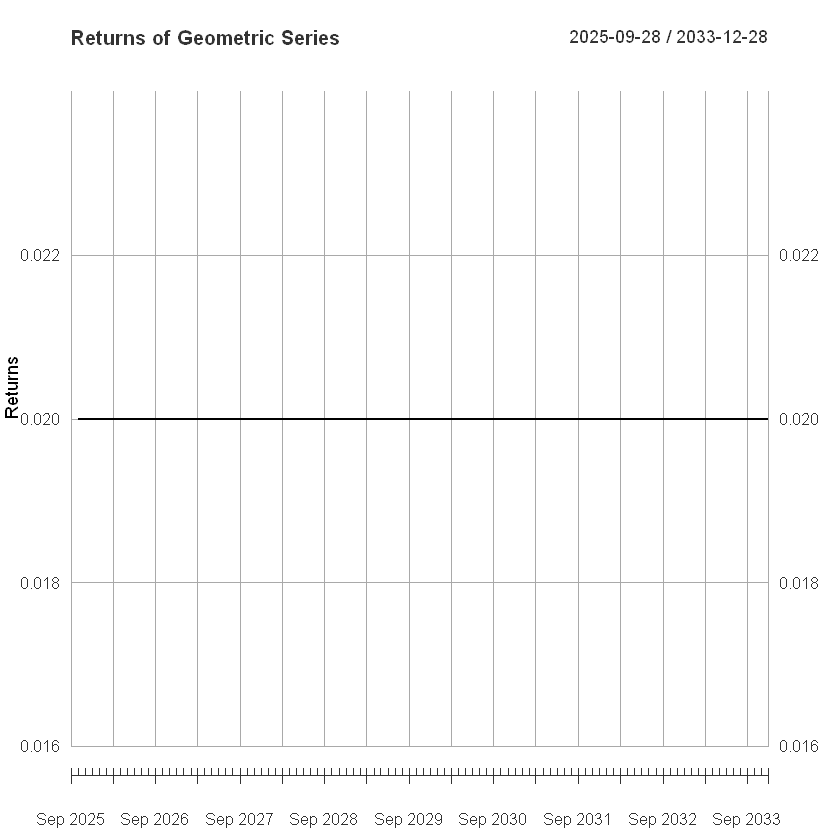

In [ ]:
# Plot the return series and the log-return series

plot(xts_geom, main = "Geometric Series and Log-Returns", ylab = expression(x[t]), xlab = "Date")
plot(diff(log(xts_geom)), main = "Log-Returns of Geometric Series", ylab = "Log-Returns", xlab = "Date")
plot(diff(xts_geom) / lag(xts_geom), main = "Returns of Geometric Series", ylab = "Returns", xlab = "Date")

## Noisy Time Series

Let's assume that you deposit (or withdraw) a random amount of money every month, for example between -5 and +5 USD, reflecting your monthly expenses and income.
On average, you expect to deposit 0 USD per month.
Let's assume that every amount is equally likely (uniform distribution) and that the distribution of deposits/withdrawals does not change over time.
In other words we assume that the deposits/withdrawals are i.i.d. (independent and identically distributed) random variables.

The independent assumption means that the distribution of the deposit/withdrawal at time $t$ does not depend on the deposits/withdrawals at previous times.
For example, if you withdrew a large amount of money in some month (to buy a car for example) and then you
decide that you need to save more in the months after to
compensate for the withdrawal, then the deposits/withdrawals would not be independent.

The model for your bank account balance is now:

$$
\begin{align}
x_t & = (1 + 0.02)x_{t - 1} + \epsilon_t,\quad x_0 = 10 \\
\epsilon_t & \sim \text{i.i.d. } U(-5, 5)
\end{align}
$$

where $\epsilon_t$ is a random variable representing the random deposit or withdrawal at time $t$.

For simplicity, we assume that your bank account balance can go negative (i.e. you can have an overdraft) and that the
interest is paid on the negative balance as well (i.e. you pay the bank for the credit).

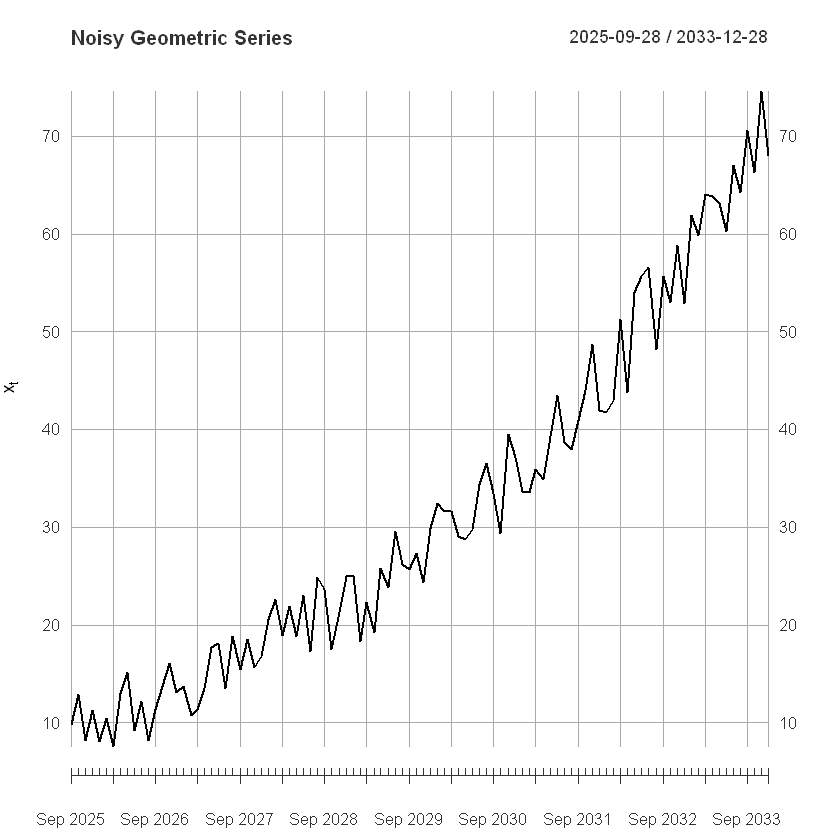

In [ ]:
# Exercise: generate a noisy version of your bank account series
# Use the runif function to generate random numbers between -5 and 5
# Plot the series

xts_geom_rand <- xts_geom + runif(n = length(xts_geom), min=-5, max=5)
plot(xts_geom_rand, main = "Noisy Geometric Series", ylab = expression(x[t]), xlab = "Date")


In [ ]:
# Exercise: plot the return series and the log-return series


## Forecasting

A main goal of this course is to learn how to forecast future values of a time series based on its past values. This is especially
important in all areas of business and economics. For example, a company might want to forecast future sales to plan its production and inventory
or a central bank needs to forecast inflation to set its monetary policy.

In the case of the deterministic series we could simply use the formula in equation {eq-geom-series} to compute the future values of the series.
And we will be able to forecast the future values of the series without error. With the noisy series, however, every forecast will be subject to some error.

## The Naive Forecast

The simplest forecast is the so-called *naive forecast*. You just take the last observed value of the series and this is your forecast for all future values.


In [ ]:
# Assume that the observations end on 2028-12-31 and you want to forecast 12 months ahead
# What is the value of the series on in December 2028?

xts_geom_rand["2028-12"]

              [,1]
2028-12-28 25.0052

In [ ]:
xts_geom_rand["/2028-12"] %>%
    naive(h=12)

   Point Forecast     Lo 80    Hi 80       Lo 95    Hi 95
41        25.0052 20.289176 29.72123 17.79266278 32.21774
42        25.0052 18.335734 31.67467 14.80513134 35.20527
43        25.0052 16.836806 33.17360 12.51271783 37.49769
44        25.0052 15.573150 34.43725 10.58012385 39.43028
45        25.0052 14.459848 35.55056  8.87747437 41.13293
46        25.0052 13.453345 36.55706  7.33816158 42.67224
47        25.0052 12.527770 37.48263  5.92261737 44.08779
48        25.0052 11.666267 38.34414  4.60506096 45.40534
49        25.0052 10.857125 39.15328  3.36758491 46.64282
50        25.0052 10.091819 39.91858  2.19715097 47.81325
51        25.0052  9.363914 40.64649  1.08391628 48.92649
52        25.0052  8.668409 41.34199  0.02023394 49.99017

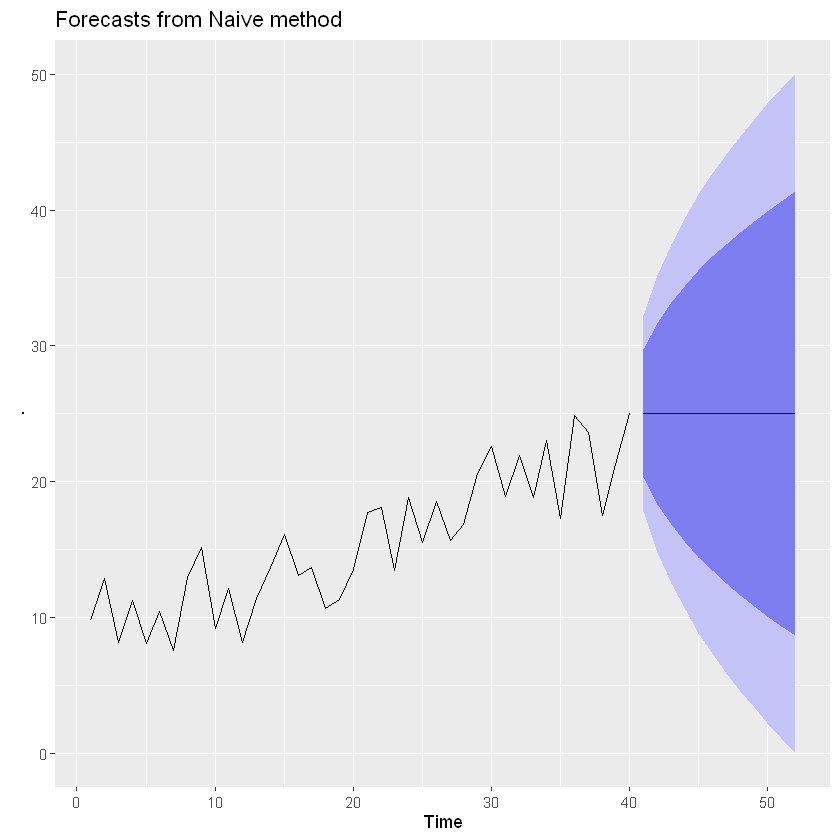

In [ ]:
library(forecast)

xts_geom_rand["/2028-12"] %>%
    naive(h=12) %>%
    autoplot()

In [ ]:
naive(xts_geom_rand["/2028-12"], h=12)

   Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
41        25.0052 20.289176 29.72123 17.792663 32.21774
42        25.0052 18.335734 31.67467 14.805131 35.20527
43        25.0052 16.836806 33.17360 12.512718 37.49769
44        25.0052 15.573150 34.43725 10.580124 39.43028
45        25.0052 14.459848 35.55056  8.877474 41.13293
46        25.0052 13.453345 36.55706  7.338162 42.67224
47        25.0052 12.527770 37.48263  5.922617 44.08779
48        25.0052 11.666267 38.34414  4.605061 45.40534
49        25.0052 10.857125 39.15328  3.367585 46.64282
50        25.0052 10.091819 39.91858  2.197151 47.81325
51        25.0052  9.363914 40.64649  1.083916 48.92649

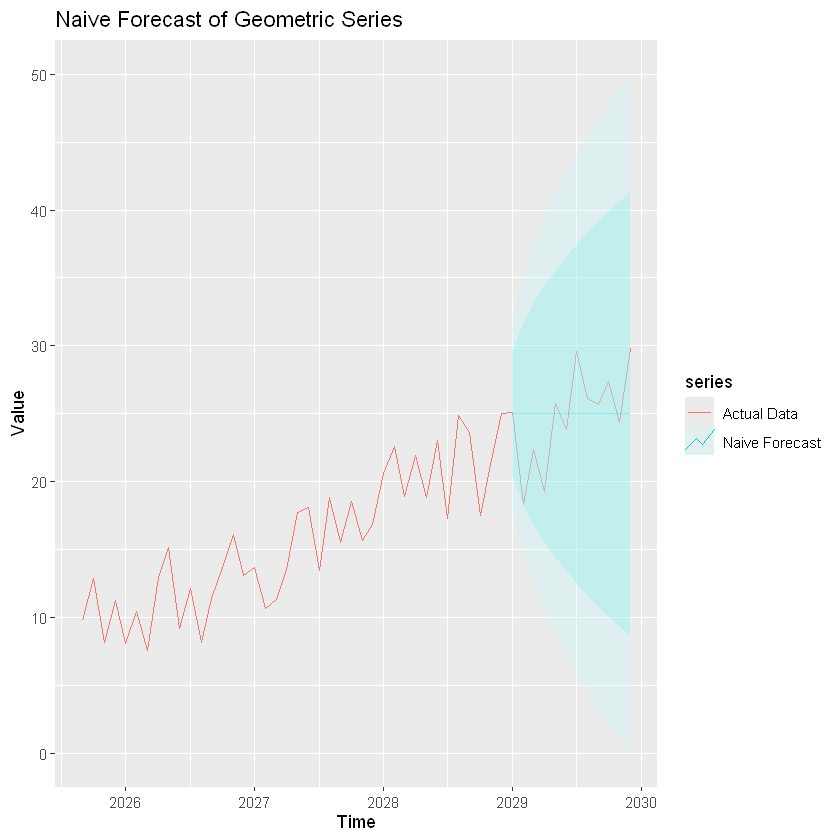

In [ ]:
# Let's do the same but we will also show the real data points
# First, let's make sure we have the necessary libraries loaded
library(forecast)
library(ggplot2)

# Convert xts to ts object for better compatibility with forecast functions
# Extract the data up to 2028-12 and convert to ts
historical_data <- xts_geom_rand["/2028-12"]
ts_historical <- ts(as.numeric(historical_data),
                    start = c(year(today), month(today)),
                    frequency = 12)
ts_all <- ts(as.numeric(xts_geom_rand["/2029-12"]),
               start = c(year(today), month(today)),
               frequency = 12)

# Create the forecast
forecast_obj <- naive(ts_historical, h=12)

# Plot using autoplot
autoplot(ts_all, series = "Actual Data") +
  autolayer(forecast_obj, series = "Naive Forecast", alpha=0.3) +
  labs(title = "Naive Forecast of Geometric Series",
       x = "Time", y = "Value")

## Forecasting Error

There are several measures of forecasting error that we will encounter in this course. One of the most important
if the Squared Forecast Error (SFE) which is defined as:

$$
\text{SFE} = \sum_{\tau = t}^{t + h} (x_{\tau} - \hat{x}_{\tau})^2
$$

where $x_t$ is the actual value of the series at time $t$ and $\hat{x}_t$ is the forecasted value of the series at time $t$.

:::{.callout-note }
## Hats

As we did in our econometrics course, we will use hats to denote forecasts or estimates of parameters.
As is customary in the time-series literature we will use the same notation for the _value_ of the forecast
and the _function_ that produces the forecast. The two are _not_ the same!
The forecast function takes as input the past values of the series and produces as output the forecasted value.

In the naive forecast $\hat{x}_t = x_{t-1}$, the forecast function simply returns
the last observed value of the series.

:::

The squared error gives you an idea about how different your forecasts are from the actual values of the series.
For a perfect forecast the squared error is 0.  It has two drawbacks, however:

1. It depends on the number of forecasted values $h$ and so it will grow with $h$. This makes it hard to compare the forecasting error when considering different forecast horizons.
2. It has a strange measurement unit. If the series $x_t$ is measured in USD, then the squared error is measured in USD$^2$.

We can cure the first issue by dividing the squared error by the number of forecasted values $h$. This gives us the Mean Squared Error (MSE):

$$
\text{MSE} = \frac{1}{h} \sum_{\tau = t}^{t + h} (x_{\tau} - \hat{x}_{\tau})^2
$$

We can address the second issue by taking the square root of the MSE. This gives us the Root Mean Squared Error (RMSE):

$$
\text{RMSE} = \sqrt{\frac{1}{h} \sum_{\tau = t}^{t + h} (x_{\tau} - \hat{x}_{\tau})^2}
$$

Now we have an error measure on the same scale as the original series and that does not depend on the number of forecasted values.

It is still hard to compare the RMSE of two different series, however, because the RMSE still depends on the scale of the series. For example, if the series $x_t$ is measured in USD and the series $y_t$ is measured in EUR, then the RMSE of the two series will not be compatible.

One way to address this issue is to use the $R^2$ measure of forecasting accuracy:

$$
R^2 = 1 - \frac{\sum_{\tau = t}^{t + h} (x_{\tau} - \hat{x}_{\tau})^2}{\sum_{\tau = t}^{t + h} (x_{\tau} - \bar{x})^2}
$$

:::{.callout-note }
## $R^2$ Measure

In econometrics we used the $R^2$ measure to assess the goodness of fit of a regression model and argued
that it is bounded between 0 and 1. This is true when calculating $R^2$ on the same data that was used to estimate the model.

This is not the case for the $R^2$ measure of forecasting accuracy
because test data and the training data are different. In fact, the $R^2$ measure of forecasting accuracy can become negative.

:::